In [ ]:
!pip install -U layoutparser

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 33.4 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [ ]:
pip install git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2

  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-ohqgvhd7/detectron2_1bf2136ffe7141c7b3798d3b5ffcec16
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-ohqgvhd7/detectron2_1bf2136ffe7141c7b3798d3b5ffcec16
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Resolved https://github.com/facebookresearch/detectron2.git to commit 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install layoutparser[ocr]
!pip install layoutparser[detectron2]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/paper-image.jpg")
image = image[..., ::-1]


In [ ]:
!pip install Pillow==8.4.0


import layoutparser as lp
from PIL import Image # This line is added to import Image

model = lp.Detectron2LayoutModel('lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config',extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.65],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})
layout = model.detect(image)
# The change below adds a parameter to draw_box to change the box width:
lp.draw_box(image, layout, box_width=3)

  Using cached Pillow-8.4.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.5 kB)
Using cached Pillow-8.4.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.1.0
    Uninstalling pillow-11.1.0:
      Successfully uninstalled pillow-11.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.18 requires pillow>=9.0.0, but you have pillow 8.4.0 which is incompatible.
google-genai 0.3.0 requires pillow<12.0.0,>=10.0.0, but you have pillow 8.4.0 which is incompatible.
pdfplumber 0.11.5 requires Pillow>=9.1, but you have pillow 8.4.0 which is incompatible.
scikit-image 0.25.0 requires pillow>=10.1, but you have pillow 8.4.0 which is incompatible.


config.yml?dl=1: 8.19kB [00:01, 5.28kB/s]
model_final.pth?dl=1:  85%|████████▌ | 281M/330M [00:11<00:01, 30.3MB/s]

In [ ]:
text_blocks = lp.Layout([b for b in layout if b.type=="Text"])
text_blocks

In [ ]:
figure_blocks = lp.Layout([b for b in layout if b.type=='Figure'])

In [ ]:
figure_blocks

In [ ]:

text_blocks = lp.Layout([b for b in text_blocks \
                   if not any(b.is_in(b_fig) for b_fig in figure_blocks)])

In [ ]:
h, w = image.shape[:2]

left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)

left_blocks = text_blocks.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1])

right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])

# And finally combine the two list and add the index
# according to the order
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

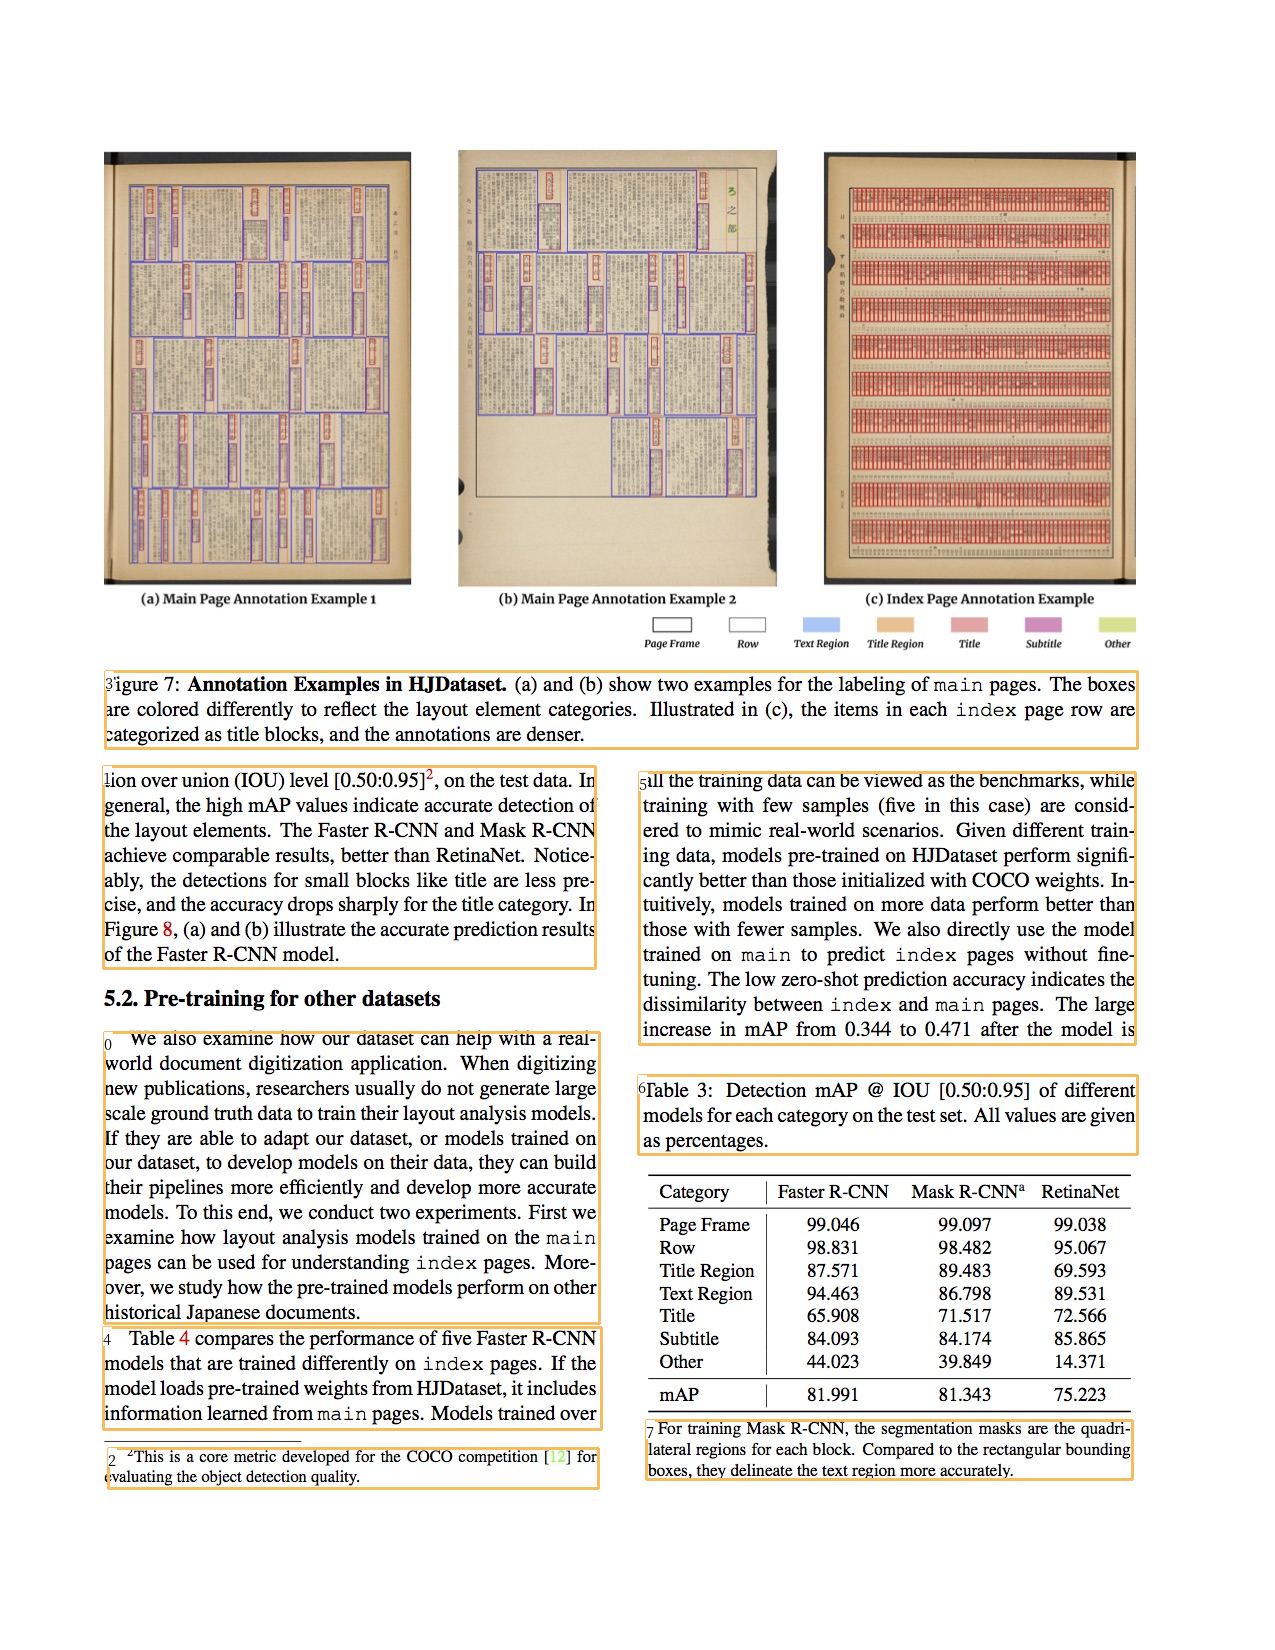

In [ ]:

lp.draw_box(image, text_blocks,
            box_width=3,
            show_element_id=True)

In [ ]:
ocr_agent = lp.TesseractAgent(languages='eng')
    # Initialize the tesseract ocr engine. You might need
    # to install the OCR components in layoutparser:
    # pip install layoutparser[ocr]

In [ ]:
!sudo apt install tesseract-ocr


In [ ]:
for block in text_blocks:
    segment_image = (block
                       .pad(left=5, right=5, top=5, bottom=5)
                       .crop_image(image))
        # add padding in each image segment can help
        # improve robustness

    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)

In [ ]:
for txt in text_blocks.get_texts():
    print(txt, end='\n---\n')

In [ ]:
text_blocks.get_texts()

In [ ]:
for block in text_blocks:
  print(block)

In [ ]:
!pip install spacy

In [ ]:
!pip install spacy-transformers
!python -m spacy download en_core_web_trf

In [ ]:
!pip install click==8.0.0

In [ ]:
import spacy
nlp = spacy.load("en_core_web_trf")


In [ ]:
sentence=["".join(txt) for txt in text_blocks.get_texts()]

In [ ]:
".".join(sentence)

In [ ]:
doc = nlp(".".join(sentence))
for ent in doc.ents:
  print(ent.text,ent.label_)